In [ ]:
# Load Packages
import numpy as np
#https://numpy.org/doc/stable/user/tutorials_index.html

import pandas as pd
#https://pandas.pydata.org/docs/reference/index.html

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
#https://matplotlib.org/tutorials/index.html

%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
print(df.shape)

(150, 5)


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df_2=df.loc[df['species'].isin(['setosa', 'versicolor'])] 

In [ ]:
df_2D=df_2.drop(['petal_length', 'petal_width'], axis=1)

In [ ]:
df_2D

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa
...,...,...,...
95,5.7,3.0,versicolor
96,5.7,2.9,versicolor
97,6.2,2.9,versicolor
98,5.1,2.5,versicolor


20 Samples from Iris Dataset

In [ ]:
Data_2D=df_2D.loc[40:59,:]

In [ ]:
Data_2D

,sepal_length,sepal_width,species
40,5.0,3.5,setosa
41,4.5,2.3,setosa
42,4.4,3.2,setosa
43,5.0,3.5,setosa
44,5.1,3.8,setosa
45,4.8,3.0,setosa
46,5.1,3.8,setosa
47,4.6,3.2,setosa
48,5.3,3.7,setosa
49,5.0,3.3,setosa


In [ ]:
Data_2D.shape

(20, 3)

In [ ]:
Df_Data=Data_2D.drop(['species'], axis=1)

In [ ]:
Df_Data

,sepal_length,sepal_width
40,5.0,3.5
41,4.5,2.3
42,4.4,3.2
43,5.0,3.5
44,5.1,3.8
45,4.8,3.0
46,5.1,3.8
47,4.6,3.2
48,5.3,3.7
49,5.0,3.3


In [ ]:
Y=Data_2D.loc[:,'species']

In [ ]:
Y

40        setosa
41        setosa
42        setosa
43        setosa
44        setosa
45        setosa
46        setosa
47        setosa
48        setosa
49        setosa
50    versicolor
51    versicolor
52    versicolor
53    versicolor
54    versicolor
55    versicolor
56    versicolor
57    versicolor
58    versicolor
59    versicolor
Name: species, dtype: object

In [ ]:
rows_setosa = Y=='setosa';
rows_versicolor = Y=='versicolor';

Text(0.5, 1.0, 'Scatterplot of 2D data')

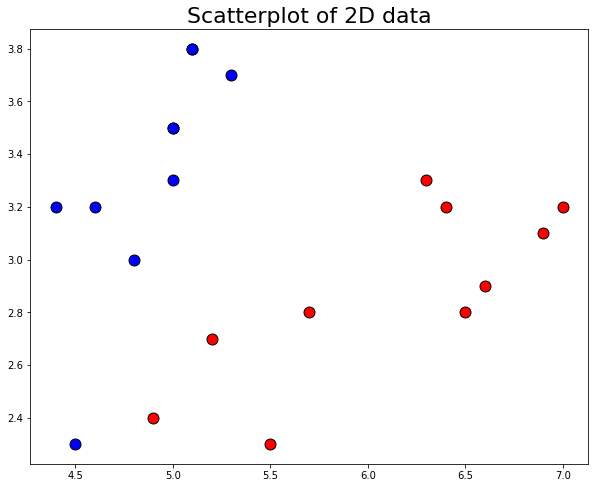

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.scatter(Data_2D.loc[rows_setosa.tolist(), 'sepal_length'], Data_2D.loc[rows_setosa.tolist(), 'sepal_width'], c='blue', edgecolor='k', s=120, label='Zero')
ax.scatter(Data_2D.loc[rows_versicolor.tolist(), 'sepal_length'], Data_2D.loc[rows_versicolor.tolist(), 'sepal_width'], c='red', edgecolor='k', s=120, label='One')
ax.set_title("Scatterplot of 2D data", fontsize=22)

#**Principal Component Analysis**

In [ ]:
pca = PCA(n_components=1)
np_pca = pca.fit_transform(X=Df_Data)

In [ ]:
pca.components_

array([[ 0.99986238, -0.01658974]])

Text(0.5, 1.0, 'Scatterplot of 1st principal component')

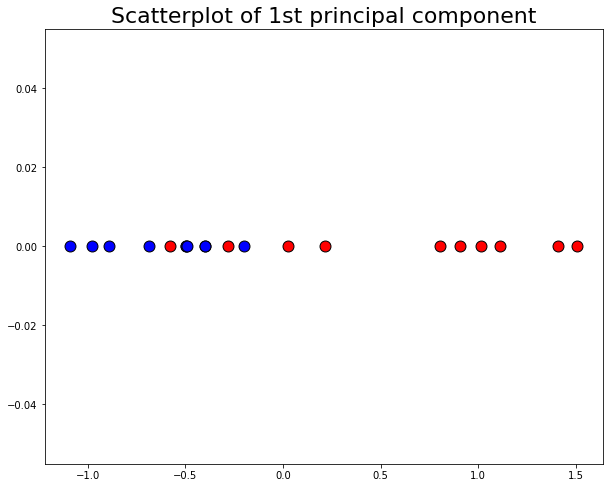

In [ ]:
df_pca=pd.DataFrame(np_pca)
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.scatter(df_pca.loc[rows_setosa.tolist(), 0], np.zeros([10]), c='blue', edgecolor='k', s=120, label='Zero')
ax.scatter(df_pca.loc[rows_versicolor.tolist(), 0], np.zeros([10]), c='red', edgecolor='k', s=120, label='One')
ax.set_title("Scatterplot of 1st principal component", fontsize=22)

Text(0.5, 1.0, 'Scatterplot of 2D data')

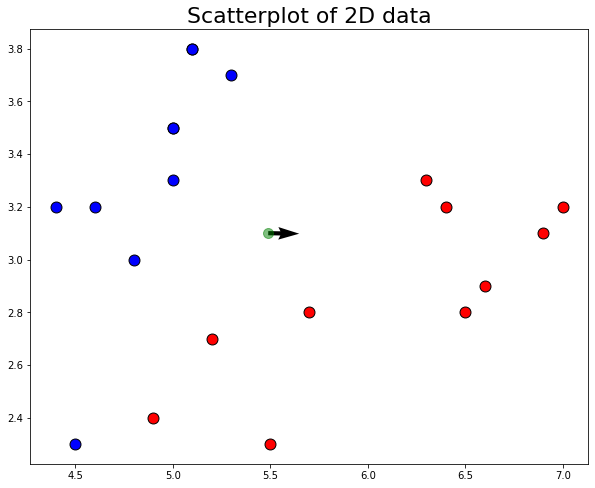

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.scatter(Data_2D.loc[rows_setosa.tolist(), 'sepal_length'], Data_2D.loc[rows_setosa.tolist(), 'sepal_width'], c='blue', edgecolor='k', s=120, label='Zero')
ax.scatter(Data_2D.loc[rows_versicolor.tolist(), 'sepal_length'], Data_2D.loc[rows_versicolor.tolist(), 'sepal_width'], c='red', edgecolor='k', s=120, label='One')
ax.plot(np.mean(Data_2D['sepal_length'].values), np.mean(Data_2D['sepal_width'].values), 'o', markersize=10, color='green', alpha=0.5)

ax.quiver([np.mean(Data_2D['sepal_length'].values)],[ np.mean(Data_2D['sepal_width'].values)], [pca.components_[0,0]], [pca.components_[0,1]])

ax.set_title("Scatterplot of 2D data", fontsize=22)

#**Linear Discriminant Analysis**

In [ ]:
lda = LDA(solver='eigen')
X_LDA_1D = lda.fit_transform(Df_Data.values, Y.values)

In [ ]:
lda.scalings_

array([[-2.44434113, -0.70802416],
       [ 2.98558589, -1.87780321]])

In [ ]:
lda.scalings_[:,0][1]

2.985585888558023

Text(0.5, 1.0, 'Scatterplot of 2D data')

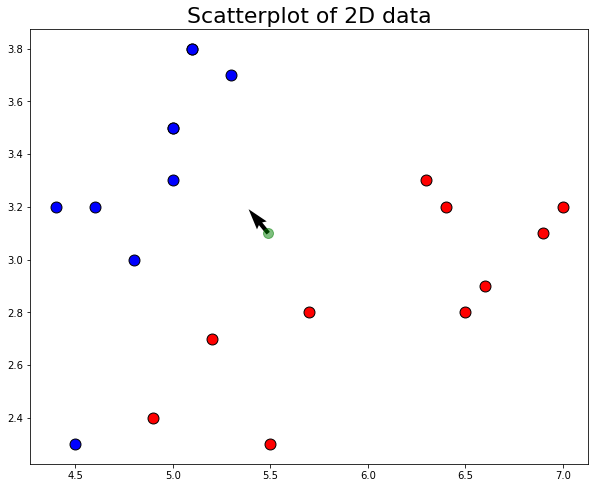

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.scatter(Data_2D.loc[rows_setosa.tolist(), 'sepal_length'], Data_2D.loc[rows_setosa.tolist(), 'sepal_width'], c='blue', edgecolor='k', s=120, label='Zero')
ax.scatter(Data_2D.loc[rows_versicolor.tolist(), 'sepal_length'], Data_2D.loc[rows_versicolor.tolist(), 'sepal_width'], c='red', edgecolor='k', s=120, label='One')
ax.plot(np.mean(Data_2D['sepal_length'].values), np.mean(Data_2D['sepal_width'].values), 'o', markersize=10, color='green', alpha=0.5)

ax.quiver([np.mean(Data_2D['sepal_length'].values)],[ np.mean(Data_2D['sepal_width'].values)], [lda.scalings_[:,0][0]], [lda.scalings_[:,0][1]])

ax.set_title("Scatterplot of 2D data", fontsize=22)

Text(0.5, 1.0, 'Scatterplot of 1st linear discriminant')

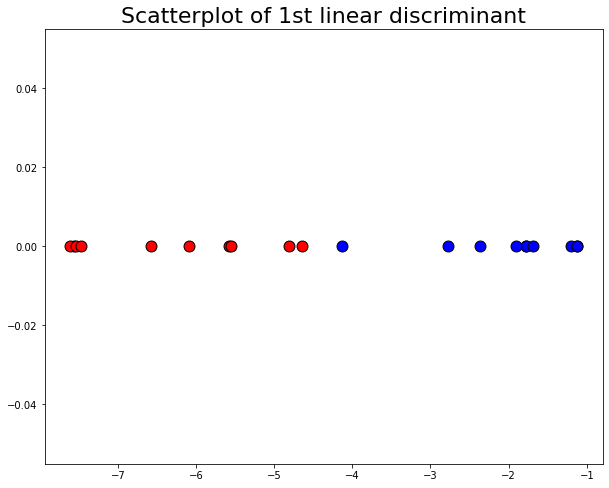

In [ ]:
df_lda=pd.DataFrame(X_LDA_1D)
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.scatter(df_lda.loc[rows_setosa.tolist(), 0], np.zeros([10]), c='blue', edgecolor='k', s=120, label='Zero')
ax.scatter(df_lda.loc[rows_versicolor.tolist(), 0], np.zeros([10]), c='red', edgecolor='k', s=120, label='One')
ax.set_title("Scatterplot of 1st linear discriminant", fontsize=22)